# การทดลองเสริม: การถดถอยโลจิสติก (Logistic Regression) และขอบเขตการตัดสินใจ (Decision Boundary)


## เป้าหมาย
ในห้องปฏิบัติการนี้ คุณจะ:
- วาดกราฟเส้นแบ่งเขตการตัดสินใจ (decision boundary) ของโมเดลการถดถอยโลจิสติก (logistic regression model) การทำเช่นนี้จะช่วยให้คุณเข้าใจได้ดีขึ้นว่าโมเดลกำลังทำนายอะไร









In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
try:
  %matplotlib widget
  print("widget is already installed")
except:
  print("widget is not been installed, install now..")
  !pip install ipympl

In [ ]:
# prompt: import requsts and download from this github link : https://raw.githubusercontent.com/Smith-WeStrideTH/Machine_Learning_Course/main/work/deeplearning.mplstyle

import requests
from pathlib import Path

url = 'https://raw.githubusercontent.com/Smith-WeStrideTH/Machine_Learning_Course/main/work/deeplearning.mplstyle'
url2 = 'https://raw.githubusercontent.com/Smith-WeStrideTH/Machine_Learning_Course/main/work/lab_utils_common_c3.py'
url3 = 'https://raw.githubusercontent.com/Smith-WeStrideTH/Machine_Learning_Course/main/work/plt_one_addpt_onclick.py'

response = requests.get(url)
with open('deeplearning.mplstyle', 'wb') as f:
  f.write(response.content)

response = requests.get(url2)
with open('lab_utils_common.py', 'wb') as f:
  f.write(response.content)

response = requests.get(url3)
with open('plt_one_addpt_onclick.py', 'wb') as f:
  f.write(response.content)

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid, draw_vthresh
plt.style.use('./deeplearning.mplstyle')

## Dataset

ชุดข้อมูล (Dataset)
สมมติว่าคุณมีชุดข้อมูลการฝึก (training dataset) ดังต่อไปนี้:
- ตัวแปรอินพุต `X` เป็นอาร์เรย์ NumPy ที่มี 6 ตัวอย่างการฝึก (training examples) โดยแต่ละตัวอย่างมีสองฟีเจอร์ (features)
- ตัวแปรเอาต์พุต `y` เป็นอาร์เรย์ NumPy ที่มี 6 ตัวอย่างเช่นกัน และ `y` มีค่าเป็น `0` หรือ `1`








In [2]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

### พล็อตข้อมูล
มาใช้ฟังก์ชันช่วยในการพล็อตข้อมูลนี้กัน ข้อมูลจุดที่มีป้ายกำกับ $y=1$ จะแสดงเป็นกากบาทสีแดง ขณะที่ข้อมูลจุดที่มีป้ายกำกับ $y=0$ จะแสดงเป็นวงกลมสีน้ำเงิน









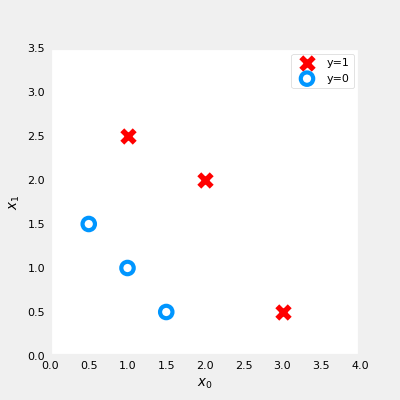

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

## โมเดลการถดถอยโลจิสติก (Logistic Regression Model)

* สมมติว่าคุณต้องการฝึกโมเดลการถดถอยโลจิสติกบนข้อมูลนี้ ซึ่งมีรูปแบบดังนี้

  $f(x) = g(w_0x_0+w_1x_1 + b)$
  
  โดย $g(z) = \frac{1}{1+e^{-z}}$, เป็นฟังก์ชันซิกโมิด (sigmoid function)


* สมมติว่าคุณได้ฝึกโมเดลแล้วและได้พารามิเตอร์ดังนี้ $b = -3, w_0 = 1, w_1 = 1$. ดังนั้น,

  $f(x) = g(x_0+x_1-3)$

  (คุณจะได้เรียนรู้วิธีการปรับค่าพารามิเตอร์เหล่านี้ให้เหมาะกับข้อมูลในบทเรียนต่อไป)
  
มาลองทำความเข้าใจว่าโมเดลที่ฝึกแล้วนี้กำลังทำนายอะไรกันบ้าง โดยการพล็อตเส้นแบ่งเขตการตัดสินใจ (decision boundary)


### ทบทวน Logistic Regression และ Decision Boundary

* นึกย้อนถึงโมเดล Logistic Regression ซึ่งแสดงโดยสมการ:

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  โดยที่ $g(z)$ เป็นฟังก์ชัน sigmoid ที่ทำการแมปค่าอินพุตทั้งหมดไปยังค่าระหว่าง 0 ถึง 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  และ $\mathbf{w} \cdot \mathbf{x}$ เป็นผลคูณดอทของเวกเตอร์ :
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * เราตีความผลลัพธ์ของโมเดล  ($f_{\mathbf{w},b}(x)$) เป็นความน่าจะเป็นที่ $y=1$ เมื่อกำหนด $\mathbf{x}$ และพารามิเตอร์ $\mathbf{w}$ และ $b$.
* ดังนั้น เพื่อให้ได้การทำนายสุดท้าย ($y=0$ or $y=1$) จากโมเดล Logistic Regression เราสามารถใช้ยุทธวิธีต่อไปนี้

  ถ้า $f_{\mathbf{w},b}(x) >= 0.5$, ทำนาย $y=1$
  
  ถ้า $f_{\mathbf{w},b}(x) < 0.5$, ทำนาย $y=0$
  
  
* มาพล็อตฟังก์ชัน sigmoid เพื่อดูว่าที่ใด $g(z) >= 0.5$


In [ ]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

* จากที่คุณสังเกตเห็น, $g(z) >= 0.5$ for $z >=0$

* สำหรับ logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. ดังนั้น,

  ถ้า $\mathbf{w} \cdot \mathbf{x} + b >= 0$, โมเดลทำนาย $y=1$
  
  ถ้า $\mathbf{w} \cdot \mathbf{x} + b < 0$, โมเดลทำนาย $y=0$
  
  
  
### การพล็อตกราฟเส้นแบ่งการตัดสินใจ (Decision Boundary)


ตอนนี้เรามาดูตัวอย่างเพื่อทำความเข้าใจว่าโมเดลการถดถอยโลจิสติกทำการทำนายอย่างไร

* โมเดลการถดถอยโลจิสติกของเรามีรูปแบบดังนี้


  $f(\mathbf{x}) = g(-3 + x_0+x_1)$


* จากสิ่งที่คุณได้เรียนรู้ข้างต้น คุณจะเห็นว่าโมเดลนี้ทำนาย $y=1$ if $-3 + x_0+x_1 >= 0$

มาดูกันว่ากราฟนี้เป็นอย่างไร เราจะเริ่มต้นด้วยการพล็อตกราฟ  $-3 + x_0+x_1 = 0$, ซึ่งเทียบเท่ากับ $x_1 = 3 - x_0$.


In [ ]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

* ในพล็อตข้างต้น เส้นสีน้ำเงินแสดงถึงเส้นตรง  $x_0 + x_1 - 3 = 0$ และควรตัดแกน x1 ที่ 3 (ถ้าเราตั้ง $x_1$ = 3, $x_0$ = 0)  และแกน x0 ที่ 3 (ถ้าเราตั้ง $x_1$ = 0, $x_0$ = 3). 


* ภูมิภาคที่ถูกแรเงา แสดง $-3 + x_0+x_1 < 0$. ภูมิภาคที่ถูกแรเงาข้างบนเส้นคือ  $-3 + x_0+x_1 > 0$.


*ภูมิภาคที่ถูกแรเงา (ใต้เส้น) จะถูกจัดประเภทเป็น $y=0$
จุดใด ๆ ที่อยู่บนเส้นหรือเหนือเส้นจะถูกจัดประเภทเป็น $y=1$
เส้นนี้เรียกว่า "เส้นแบ่งเขตการตัดสินใจ" (decision boundary)



ตามที่เราได้เรียนรู้ในบทบรรยายก่อนหน้านี้ การใช้พหุนามที่มีอันดับสูงขึ้น (เช่น  $f(x) = g( x_0^2 + x_1 -1)$, wสามารถสร้างขอบเขตที่ไม่เชิงเส้น (non-linear) ที่ซับซ้อนมากขึ้นได้

## ยินดีด้วย!
คุณได้สำรวจขอบเขตการตัดสินใจ (decision boundary) ในบริบทของการถดถอยโลจิสติก (logistic regression) แล้ว